In [1]:
# Gerekli kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import itertools

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Verisetinin okunması
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Veri boyutunun öğrenilmesi
df.shape

(4269, 13)

In [4]:
# Verisetindeki sütunlar hakkında temel bilginin edinilmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
# Sütun adları başındaki boşlukların düzeltilmesi
df.columns = [col.strip(" ") for col in df.columns]

In [6]:
# Hedef değişken, label encode edilmesi gerekli
df.loan_status.value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [7]:
# hedef değişkenin 0-1 şeklinde encode edilmesi
le = preprocessing.LabelEncoder()
df['loan_status'] = le.fit_transform(df.loan_status.values)

In [8]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [9]:
# loan_id değişkeni anlamlı bir değişken olmadığı için çıkarıldı
df.drop(["loan_id"], inplace=True, axis = 1)

In [10]:
# Bağımlı değişken ve bağımsız değişkenler ayrıldç

y = df["loan_status"]
X = df.drop(["loan_status"], axis = 1)

In [11]:
# Veride işlemler yapılmadan önce overfitting önlemek için train-test ayrımı yapıldı.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3415, 11) (854, 11) (3415,) (854,)


In [13]:
### Veri setinde herhangi bir null değer yok

In [14]:
# Düzgün dağılan ve aykıdır veri içermeyen data olduğu için, olduğu gibi bırakıldı
df.no_of_dependents.value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [15]:
# Düzgün dağılımlı bir veri ve kategorik olduğu için label encode yapılmalı
df.education.value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [16]:
# Düzgün dağılımlı bir veri ve kategorik olduğu için label encode yapılmalı
df.self_employed.value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [17]:
# Verisetindeki diğer sayısal verilerin dağılımına bakıldı
# residential_assets_value değerindeli min değerinin negatif olması haricinde bir sorun görülmedi
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,0.0,1.0,3.0,4.0,5.0,5.0,5.00,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,1100000.0,2700000.0,5100000.0,7500000.0,8900000.0,9400000.0,9800000.00,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,3200000.0,7700000.0,14500000.0,21500000.0,28000000.0,30900000.0,35700000.00,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,4.0,6.0,10.0,16.0,18.0,20.0,20.00,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,360.0,453.0,600.0,748.0,837.0,869.0,894.32,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,700000.0,2200000.0,5600000.0,11300000.0,17200000.0,21260000.0,25400000.00,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,400000.0,1300000.0,3700000.0,7600000.0,11700000.0,13900000.0,16732000.00,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,3200000.0,7500000.0,14600000.0,21700000.0,27720000.0,31300000.0,36032000.00,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,1000000.0,2300000.0,4600000.0,7100000.0,9700000.0,11100000.0,13100000.00,14700000.0
loan_status,4269.0,3.778402e-01,4.849042e-01,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0


In [18]:
# education ve self_employed değişkenleri encode edildi
X_train['education'] = le.fit_transform(X_train.education.values)
X_train['self_employed'] = le.fit_transform(X_train.self_employed.values)

X_test['education'] = le.fit_transform(X_test.education.values)
X_test['self_employed'] = le.fit_transform(X_test.self_employed.values)

In [19]:
# residential_assets_value değeri negatif olanlar 0 olarak düzeltildi
X_train.loc[X_train["residential_assets_value"]<0, "residential_assets_value"] = 0
X_test.loc[X_test["residential_assets_value"]<0, "residential_assets_value"] = 0

In [20]:
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
990,1,0,1,4700000,14800000,6,661,8500000,6000000,13600000,6400000
3789,2,0,0,9000000,35700000,12,339,15200000,8400000,19500000,9000000
52,5,1,0,3800000,7600000,4,689,8700000,100000,9300000,3400000
651,1,0,1,1600000,4100000,6,391,4300000,1400000,5700000,700000
3652,4,1,1,8400000,19700000,14,889,22400000,5800000,22000000,12100000


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3415 entries, 990 to 3557
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          3415 non-null   int64
 1   education                 3415 non-null   int32
 2   self_employed             3415 non-null   int32
 3   income_annum              3415 non-null   int64
 4   loan_amount               3415 non-null   int64
 5   loan_term                 3415 non-null   int64
 6   cibil_score               3415 non-null   int64
 7   residential_assets_value  3415 non-null   int64
 8   commercial_assets_value   3415 non-null   int64
 9   luxury_assets_value       3415 non-null   int64
 10  bank_asset_value          3415 non-null   int64
dtypes: int32(2), int64(9)
memory usage: 293.5 KB


In [22]:
# Seçilen 3 model üzerinden gidilmesi kararlaştırıldı ve bir liste içinde döngü sırasında eğitilmesine karar verildi
models = []
models.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models.append(('RF', RandomForestClassifier( random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier( random_state = 12345)))

results = []
names = []

In [23]:
# Model eğitimleri bir döngü içinde gerçekleştrildi
for name, model in models:
    
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        results.append(acc_score)
        names.append(name)
        msg = "%s: %f" % (name, acc_score)
        print(msg)

CART: 0.975410
RF: 0.976581
XGB: 0.976581


In [24]:
# Tum modellerin değişken önem düzeylerini gösteren bir grafik hazırlandı
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))

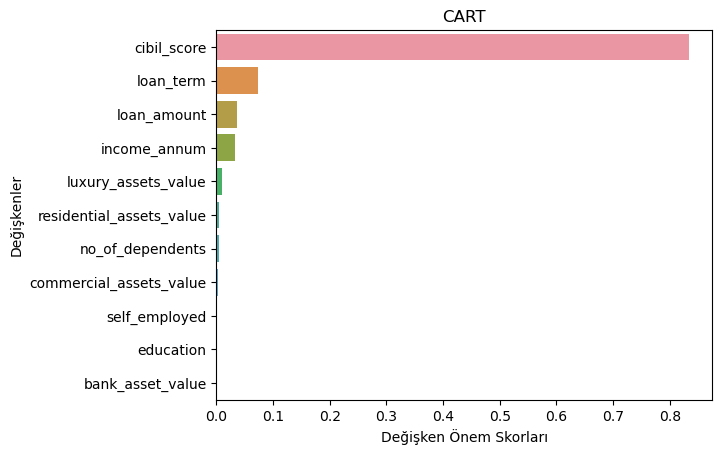

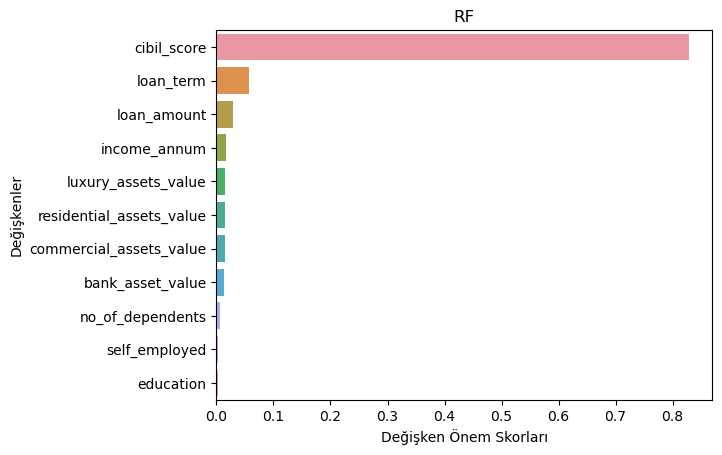

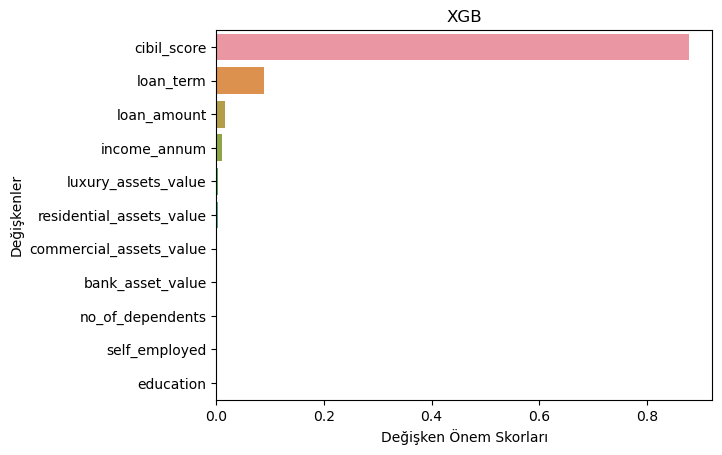

In [25]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

In [26]:
# Test modeli tahminleri yapıldı ve bir matris üzerinde gösterilmek üzere hazırlandı
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

In [27]:
TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [28]:
# confusion matrisin görselleştirmesi için hazırlanan bir fonksiyon
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

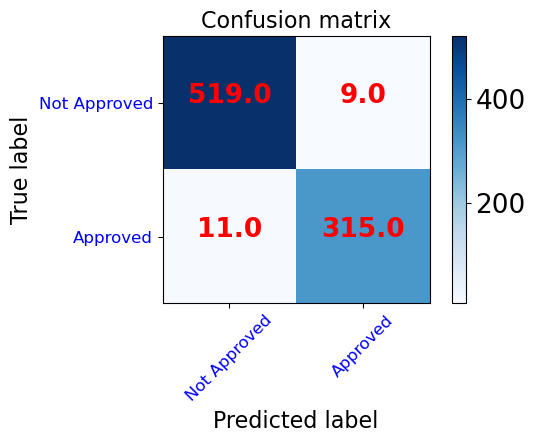

In [29]:
# confusion matrisin gösterimi
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Not Approved','Approved'],
                      title='Confusion matrix')

In [30]:
# değerlerin çıktısı
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  519
False Positives:  9
False Negatives:  11
True Positives:  315


In [31]:
# Tahmin edilen test verisinin prediction ile birleştirilmesi
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test.reset_index(drop=True)
df_pred.index = df_pred.index + 1

In [32]:
df_pred.head()

,y_test,y_pred
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1


In [33]:
# Tahmin edilen değerlerin nasıl tahmin edildiğinin veriye eklenmesi
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predicts_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predicts_indexes.append(row.name)
        
df_pred.loc[TN_predicts_indexes,"tahmin_sonuc"] = "TN"
df_pred.loc[TP_predicts_indexes,"tahmin_sonuc"] = "TP"
df_pred.loc[FP_predicts_indexes,"tahmin_sonuc"] = "FP"
df_pred.loc[FN_predicts_indexes,"tahmin_sonuc"] = "FN"
df_pred.head()

,y_test,y_pred,tahmin_sonuc
1,0,0,TN
2,1,1,TP
3,0,0,TN
4,1,1,TP
5,1,1,TP


In [34]:
# Test verisi ile tahmin edilen verilerin birleştirilmesi
df_pred = pd.concat([df_pred,X_test.reset_index(drop=True)],axis=1)

In [35]:
# Sadece hatalı tahmin edilen değerlerin ayrı bir df'de tutulması
df_hata = df_pred[(df_pred["tahmin_sonuc"]=="FP") | (df_pred["tahmin_sonuc"]=="FN")]

In [36]:
df_hata

,y_test,y_pred,tahmin_sonuc,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
22,0.0,1.0,FP,5.0,0.0,0.0,4600000.0,14400000.0,6.0,785.0,6500000.0,6300000.0,14700000.0,6200000.0
56,1.0,0.0,FN,5.0,0.0,1.0,6800000.0,22600000.0,2.0,804.0,3500000.0,12500000.0,18200000.0,9900000.0
145,1.0,0.0,FN,2.0,0.0,1.0,3500000.0,8100000.0,4.0,589.0,3800000.0,6700000.0,12500000.0,2700000.0
148,1.0,0.0,FN,1.0,1.0,1.0,5800000.0,13900000.0,6.0,345.0,4000000.0,9300000.0,20900000.0,5500000.0
277,0.0,1.0,FP,2.0,1.0,1.0,4900000.0,13800000.0,2.0,586.0,9900000.0,1400000.0,9900000.0,7000000.0
287,1.0,0.0,FN,1.0,0.0,0.0,1600000.0,4000000.0,10.0,615.0,2200000.0,2700000.0,5500000.0,1400000.0
301,1.0,0.0,FN,2.0,0.0,1.0,1700000.0,3400000.0,8.0,691.0,2700000.0,2800000.0,6000000.0,900000.0
362,0.0,1.0,FP,2.0,1.0,0.0,1200000.0,4100000.0,8.0,497.0,2700000.0,700000.0,3700000.0,1300000.0
402,0.0,1.0,FP,3.0,1.0,0.0,2200000.0,8300000.0,18.0,314.0,1100000.0,900000.0,5800000.0,2000000.0
486,1.0,0.0,FN,5.0,1.0,1.0,8000000.0,22500000.0,20.0,784.0,7600000.0,7300000.0,26000000.0,10800000.0


In [37]:
# En iyi sonuç veren modelin tuning işlemlerinin yapılması
xgb = GradientBoostingClassifier(random_state=12345)

xgb_params = {"n_estimators": [500, 1000],
              "subsample" : [0.8, 1.0],
              "max_depth" : [4, 5],
              "learning_rate" : [0.1, 0.05],
              "min_samples_split" : [2, 5]}

xgb_cv_model = GridSearchCV(xgb, 
                     xgb_params, 
                     cv = 5, 
                     n_jobs = -1, 
                     verbose = 2).fit(X_train,y_train)

print(xgb_cv_model.best_params_)

xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_,random_state=12345)
xgb_tuned = xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 1.0}
0.9812646370023419


In [38]:
# modelin api production ortamında kullanılması için kaydedilmesi
file_name = "xgb_tuned.pkl"
pickle.dump(xgb_tuned, open(file_name, "wb"))